<a href="https://colab.research.google.com/github/faizaunullah87/Tugas-Akhir/blob/main/Preprosessingskripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re

In [ ]:
def load_data():
  data = pd.read_excel('dataset2.xlsx')

  return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,NO,author,label,description,Unnamed: 4
0,1736,AquaRoots Dpx,Negatif,orang kafir pasti pesimis,2022-10-10 11:39:14
1,5504,Lilis Manalu,Positif,"Dari pada Nakut""in mending ngasih solusi",2022-10-10 11:41:14
2,1735,Yayu Kartini,Negatif,Covid19 nya hidupkan lagi bikin varian baru bi...,2022-10-10 11:41:37
3,5503,White Bird,Positif,semoga indonesia dan asia tenggara bisa tetap ...,2022-10-10 11:41:48
4,5502,ddsruipp,Positif,"selama kita niat untuk hidup, dan berserah dir...",2022-10-10 11:42:46


In [ ]:
df = pd.DataFrame(tweet_df[['label','description']])

In [ ]:
df.shape

(5502, 2)

In [ ]:
df['label'].value_counts()

Positif    2741
Negatif    1752
Netral     1009
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset Asli dan Labeling')

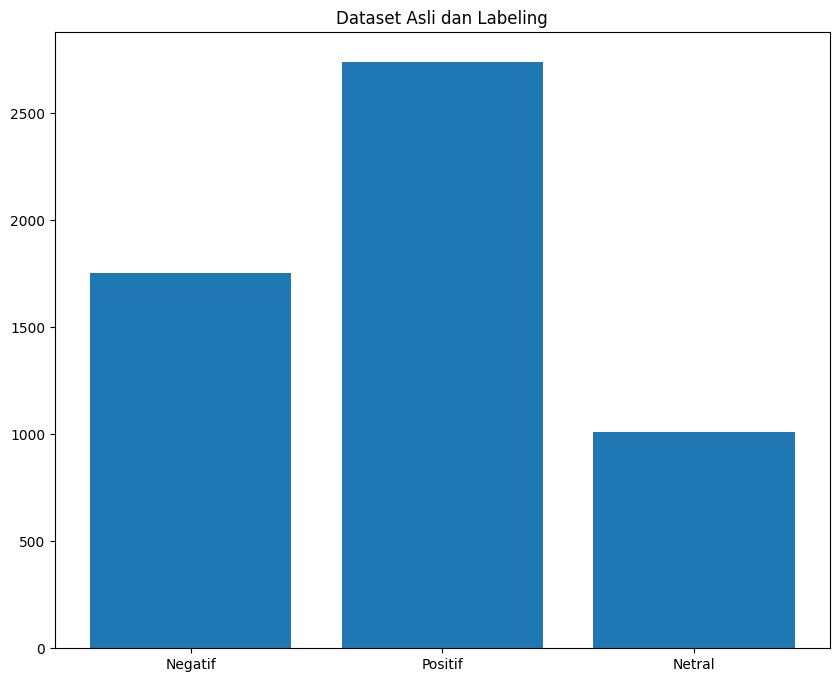

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
label_cnt = Counter(df['label'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset Asli dan Labeling")

In [ ]:
#Mengubah text menjadi lowercase
df['lower'] = df['description'].str.lower()

In [ ]:
df.head()

,label,description,lower
0,Negatif,orang kafir pasti pesimis,orang kafir pasti pesimis
1,Positif,"Dari pada Nakut""in mending ngasih solusi","dari pada nakut""in mending ngasih solusi"
2,Negatif,Covid19 nya hidupkan lagi bikin varian baru bi...,covid19 nya hidupkan lagi bikin varian baru bi...
3,Positif,semoga indonesia dan asia tenggara bisa tetap ...,semoga indonesia dan asia tenggara bisa tetap ...
4,Positif,"selama kita niat untuk hidup, dan berserah dir...","selama kita niat untuk hidup, dan berserah dir..."


In [ ]:
import re # impor modul regular expression
def hapus_angka(tweet):
    tweet = re.sub(r"\d+", "", tweet)
    return tweet

In [ ]:
df['h_angka']=df['lower'].apply(lambda x: hapus_angka(x))

In [ ]:
df.head()

,label,description,lower,h_angka
0,Negatif,orang kafir pasti pesimis,orang kafir pasti pesimis,orang kafir pasti pesimis
1,Positif,"Dari pada Nakut""in mending ngasih solusi","dari pada nakut""in mending ngasih solusi","dari pada nakut""in mending ngasih solusi"
2,Negatif,Covid19 nya hidupkan lagi bikin varian baru bi...,covid19 nya hidupkan lagi bikin varian baru bi...,covid nya hidupkan lagi bikin varian baru biar...
3,Positif,semoga indonesia dan asia tenggara bisa tetap ...,semoga indonesia dan asia tenggara bisa tetap ...,semoga indonesia dan asia tenggara bisa tetap ...
4,Positif,"selama kita niat untuk hidup, dan berserah dir...","selama kita niat untuk hidup, dan berserah dir...","selama kita niat untuk hidup, dan berserah dir..."


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#import stopword
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

In [ ]:
# all
emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',
                       '😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',
                       '😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',
                       '😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',
                       '☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',
                       '😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',
                       '🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',
                       '👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','🤝',
                       '👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',
                       '💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',
                       '🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',
                       '👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',
                       '💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',
                       '🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',
                       '🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',
                       '📉','🗒','🗓'])
# sad happy
emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',
                     ': NS)','8)',':HAI','@',':HAI)',':‑)',
                     ':P',':@','8‑D',':‑)',':-&','=D',':‑p',
                     '=‑D','XD',':D',':-))','%-)',':}',
                     ':c)',':^)',':C','>:3',':>','L',':-/','>:/',
                     ':S','>:[','@',':-(','"["',':-<',
                     '=\\','=/','>:(',':',':{','>:\\',
                     '(',':','(", ")',':','("',':-c',
                     '> :(',':‑',':NS('])
# all emot happy + sad
emoticons = emoticons_phone.union(emoticons_sad_happy)


def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    #remove coma
    tweet = re.sub(r',','',tweet)
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, 
    strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
            word not in emoticons and # remove emoticons
            word not in string.punctuation): # remove punctuation
    #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean


In [ ]:
df['token'] = df['h_angka'].apply(lambda x: clean_tweets(x))

In [ ]:
df.head()

,label,description,lower,h_angka,token
0,Negatif,orang kafir pasti pesimis,orang kafir pasti pesimis,orang kafir pasti pesimis,"[orang, kafir, pesimis]"
1,Positif,"Dari pada Nakut""in mending ngasih solusi","dari pada nakut""in mending ngasih solusi","dari pada nakut""in mending ngasih solusi","[nakut, in, mending, ngasih, solusi]"
2,Negatif,Covid19 nya hidupkan lagi bikin varian baru bi...,covid19 nya hidupkan lagi bikin varian baru bi...,covid nya hidupkan lagi bikin varian baru biar...,"[covid, nya, hidup, bikin, varian, biar, ajorr]"
3,Positif,semoga indonesia dan asia tenggara bisa tetap ...,semoga indonesia dan asia tenggara bisa tetap ...,semoga indonesia dan asia tenggara bisa tetap ...,"[moga, indonesia, asia, tenggara, tangguh, tah..."
4,Positif,"selama kita niat untuk hidup, dan berserah dir...","selama kita niat untuk hidup, dan berserah dir...","selama kita niat untuk hidup, dan berserah dir...","[niat, hidup, serah, tuhan, tuhan, buka, pintu..."


In [ ]:
#remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
#simpan di kolom tabel baru tweet
df['tweet_clean'] = df['token'].apply(lambda x: remove_punct(x))

In [ ]:
df.head()

,label,description,lower,h_angka,token,tweet_clean
0,Negatif,orang kafir pasti pesimis,orang kafir pasti pesimis,orang kafir pasti pesimis,"[orang, kafir, pesimis]",orang kafir pesimis
1,Positif,"Dari pada Nakut""in mending ngasih solusi","dari pada nakut""in mending ngasih solusi","dari pada nakut""in mending ngasih solusi","[nakut, in, mending, ngasih, solusi]",nakut in mending ngasih solusi
2,Negatif,Covid19 nya hidupkan lagi bikin varian baru bi...,covid19 nya hidupkan lagi bikin varian baru bi...,covid nya hidupkan lagi bikin varian baru biar...,"[covid, nya, hidup, bikin, varian, biar, ajorr]",covid nya hidup bikin varian biar ajorr
3,Positif,semoga indonesia dan asia tenggara bisa tetap ...,semoga indonesia dan asia tenggara bisa tetap ...,semoga indonesia dan asia tenggara bisa tetap ...,"[moga, indonesia, asia, tenggara, tangguh, tah...",moga indonesia asia tenggara tangguh tahan mog...
4,Positif,"selama kita niat untuk hidup, dan berserah dir...","selama kita niat untuk hidup, dan berserah dir...","selama kita niat untuk hidup, dan berserah dir...","[niat, hidup, serah, tuhan, tuhan, buka, pintu...",niat hidup serah tuhan tuhan buka pintu rezeki


In [ ]:
#Mengurutkan ascending urutkan kolom tweet
df.sort_values("tweet_clean", inplace = True)

In [ ]:
df.head()

,label,description,lower,h_angka,token,tweet_clean
2447,Netral,🙂🙂🙂🙂🙂😍😍😍😍😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂...,🙂🙂🙂🙂🙂😍😍😍😍😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂...,🙂🙂🙂🙂🙂😍😍😍😍😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂...,[],
2235,Netral,Yang benar,yang benar,yang benar,[],
2445,Netral,😭😭,😭😭,😭😭,[],
3857,Netral,https://t.co/xh5ItaGHuT,https://t.co/xh5itaghut,https://t.co/xhitaghut,[],
3222,Netral,🤦🏼‍♂️,🤦🏼‍♂️,🤦🏼‍♂️,"[, ]",


In [ ]:
df.to_excel('dataclean.xlsx',encoding='utf8', index=True)